In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# the data, split between train and test sets
(x_train, y_train),(x_test,y_test)=fashion_mnist.load_data()

In [4]:
#Сравниение кол-ва данных в train и test
x_train.shape[0], x_test.shape[0]

(60000, 10000)

In [5]:
#Нормализация данных
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [6]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
#Количество классов
num_classes = 10
# формат входных данных
input_shape = (28, 28, 1)

In [8]:
# OHE меток классов
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
def get_metrics(num_neurons = None, batch_size = None, epochs = None):
  #metrics_list = []

  model = Sequential(
      [
          Input(shape=input_shape),
          Flatten(),
          Dense(128, activation='relu', input_shape=(784,)),
          Dense(num_neurons, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
          Dense(num_neurons, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
          Dense(num_classes, activation="softmax"),
      ]
      )
  
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose = 0)
  
  score = model.evaluate(x_test, y_test, verbose=0)

  #metrics_list = metrics_list.append(score)
  return score


In [10]:
num_neurons_list = [1, 5, 10, 15, 20 , 40, 100]
batch_size = 1024
epochs = 15

In [11]:
metrics_neuron_list = []
for num in num_neurons_list:
  metrics_row = get_metrics(num_neurons = num, 
                            batch_size = batch_size,
                           epochs = epochs)
  metrics_row.append(num)  
  metrics_neuron_list.append(metrics_row)

In [12]:
df_neuron_metrics = pd.DataFrame(metrics_neuron_list, columns=['loss', 'accuracy', 'num_neurons'])
df_neuron_metrics
                          

,loss,accuracy,num_neurons
0,1.897819,0.1931,1
1,0.690517,0.8554,5
2,0.423668,0.8663,10
3,0.383706,0.8697,15
4,0.359300,0.8752,20
5,0.349287,0.8756,40
6,0.338920,0.8769,100


1.1 Опишите - какой результата получен в нейросети в зависимости от:
числа нейронов в слое(для 2-хслойной сети)<br>
Acuracy после достижения нейронами количества 10,  теряет темпы роста (практически выходит на плато)

In [24]:
def get_metrics_layers(num_neurons = None, n_layers = None, batch_size = None, epochs = None):

  i = 0
  model = Sequential(name='num_layers')
  model.add(Input(shape=input_shape))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', input_shape=(784,)))  
  # входной слой + поносвязный слой из 128 нейронов с активацией ReLU
  while n_layers > i:
    model.add(Dense(num_neurons, activation='tanh')) # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh
    i += 1
  model.add(Dense(10, activation='softmax')) 

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose = 0)
  
  score = model.evaluate(x_test, y_test, verbose=0)

  return score

In [26]:
num_layer_list = [2, 3, 5, 10]

In [27]:
metrics_layer_list = []
for n_layers in num_layer_list:
  #print(n_layers)
  metrics_row = get_metrics_layers(num_neurons = 10, n_layers = n_layers, batch_size = batch_size, epochs = epochs)
  #print(metrics_row)
  metrics_row.append(n_layers)
  #print(metrics_row)  
  metrics_layer_list.append(metrics_row)
  #print(metrics_layer_list)

[0.42441612482070923, 0.8658000230789185, 2]
[[0.42441612482070923, 0.8658000230789185, 2]]
[0.4199461042881012, 0.8668000102043152, 3]
[[0.42441612482070923, 0.8658000230789185, 2], [0.4199461042881012, 0.8668000102043152, 3]]
[0.4195851981639862, 0.8751000165939331, 5]
[[0.42441612482070923, 0.8658000230789185, 2], [0.4199461042881012, 0.8668000102043152, 3], [0.4195851981639862, 0.8751000165939331, 5]]
[0.4829154312610626, 0.864799976348877, 10]
[[0.42441612482070923, 0.8658000230789185, 2], [0.4199461042881012, 0.8668000102043152, 3], [0.4195851981639862, 0.8751000165939331, 5], [0.4829154312610626, 0.864799976348877, 10]]


In [28]:
df_layer_metrics = pd.DataFrame(metrics_layer_list, columns=['loss', 'accuracy', 'num_layer'])
df_layer_metrics

,loss,accuracy,num_layer
0,0.424416,0.8658,2
1,0.419946,0.8668,3
2,0.419585,0.8751,5
3,0.482915,0.8648,10


1.2 Опишите - какой результата получен в нейросети в зависимости от:
числа слоев (2, 3, 5, 10) при близких размерах сети <br>
Оптимальное количество слоев 5

2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.

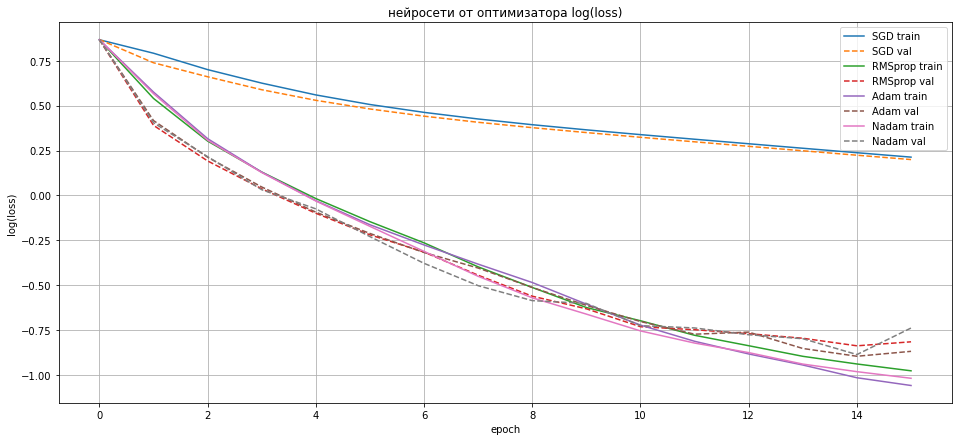

In [31]:
# создаем модель model
model = Sequential(
      [
          Input(shape=input_shape),
          Flatten(),
          Dense(128, activation='relu', input_shape=(784,)),
          Dense(10, activation='tanh'), # Скрытый слой из 10 нейронов с активацией tanh
          Dense(10, activation='tanh'), # Скрытый слой k из 10 нейронов с активацией tanh
          Dense(10, activation='tanh'), # Скрытый слой k из 10 нейронов с активацией tanh
          Dense(10, activation='tanh'), # Скрытый слой k из 10 нейронов с активацией tanh
          Dense(10, activation='tanh'), # Скрытый слой k из 10 нейронов с активацией tanh
          Dense(num_classes, activation="softmax"),
      ]
      )
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential(
      [
          Input(shape=input_shape),
          Flatten(),
          Dense(128, activation='relu', input_shape=(784,)),
          Dense(10, activation='tanh'), # Скрытый слой из 10 нейронов с активацией tanh
          Dense(10, activation='tanh'), # Скрытый слой k из 10 нейронов с активацией tanh
          Dense(10, activation='tanh'), # Скрытый слой k из 10 нейронов с активацией tanh
          Dense(10, activation='tanh'), # Скрытый слой k из 10 нейронов с активацией tanh
          Dense(10, activation='tanh'), # Скрытый слой k из 10 нейронов с активацией tanh
          Dense(num_classes, activation="softmax"),
      ]
      )
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(x_train[:48000,:], y_train[:48000],verbose = 0)
  hh0_val = modeli.evaluate(x_train[48000:,:], y_train[48000:],verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
                  x_train,
                  y_train,
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


Наименьший loss  наблюдается при применении оптимизатора Adam